<a href="https://colab.research.google.com/github/9645258/aiffel/blob/main/01_exploration/%5BE-03%5Dexploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📕  **EXPLORATION 03-1 : 학습 내용**

## 📑 **(1) 목차**

- **이전 EXPLORATION에서도학습했던 내용**  
    - 데이터 준비  
    - training dataset / test dataset 분리 작업   
    - 데이터 시각화

- **이번 EXPLORATION에서 학습한 내용**  
    - 평균, 공산, 공분산   
    - 시계열 생성  
    - 시계열 안정성의 정성적 분석  
        - 결측치 유무 확인 및 보간   
        - 이동 평균(구간 평균), 이동 표준 편차(표준 편차)  
    - Augmented Dickey-Fuller Test
        - 귀무가설, 대립가설, p-value  
        - statsmodels 패키지 (adfuller 메서드)  
    - 시계열 분해
        - 로그함수 변환  
        - 추세(trend). 차분(Differencing), 계절성(Seasonality)  
    - ARIMA 모델  
        - AR (자기 회귀), MA (이동 평균), I (차분 누적)  
        - 모수 설정 (p, d, q), ACF, PACF, 차분  
        - 모델 훈련 및 추론

## 📑 **(2) 주식 예측 준비**

- **주식 종목 선정**     
    - SAMSUNG , APPLE, XIAOMI, NOKIA, SONY  
    휴대폰 관련 주식 5종 5년치 시계열 자료 예측 및 분석  

# 📕  **EXPLORATION 03-2 :  SAMSUNG 주식 예측**

## 📑 **(1) 시계열 데이터 준비**

### 📌 **01_모듈 import**

- **pmdarima 설치**  


In [ ]:
pip install pmdarima

- **라이브러리 import**  
    - numpy, math (수치 계산)  
    - matplotlib, seaborn (시각화)  
    - pandas (행, 열 데이터 처리)  
    - pmdarima (ARIMA 추정)  
    - warnings (경고 무시)  


In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pmdarima as pm
import warnings
warnings.filterwarnings('ignore')

- **라이브러리 내 모듈 import**  
    - rcParams (그래프 설정)
    - adfuller (정량적 Augmented Dicky-Fuller Test)  
    - seasonal_decompose (시계열 분해)
    - plot_acf, plot_pacf (적정 ARIMA 모수 확인)
    - ARIMA (ARIMA 모델 빌드 및 훈련)

In [ ]:
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

### 📌 **02_시계열 생성**

- **데이터 import: pandas를 활용한 csv 파일 불러오기**  
- **컬럼 확인**  
(6개 : Date, Open, High, Low, Close, Adj, Close, Volume)  

In [ ]:
samsung_dataset = 'https://raw.githubusercontent.com/9645258/aiffel/exploration/E-03/samsung.csv'
samsung_df = pd.read_csv(samsung_dataset)
print(type(samsung_df))
samsung_df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-05-04,45700.0,45700.0,44860.0,45520.0,39431.113281,13690100
1,2017-05-08,45520.0,47020.0,45340.0,47020.0,40730.476563,19582550
2,2017-05-10,46160.0,47220.0,45600.0,45600.0,39500.417969,23410950
3,2017-05-11,45420.0,46180.0,45220.0,45500.0,39413.792969,21277850
4,2017-05-12,45760.0,46160.0,45660.0,45820.0,39690.980469,9422900


- **Date 컬럼을 index로 활용해 시계열 생성**  

In [ ]:
samsung_df = pd.read_csv(samsung_dataset, index_col='Date', parse_dates=True)
samsung_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-05-04,45700.0,45700.0,44860.0,45520.0,39431.113281,13690100
2017-05-08,45520.0,47020.0,45340.0,47020.0,40730.476563,19582550
2017-05-10,46160.0,47220.0,45600.0,45600.0,39500.417969,23410950
2017-05-11,45420.0,46180.0,45220.0,45500.0,39413.792969,21277850
2017-05-12,45760.0,46160.0,45660.0,45820.0,39690.980469,9422900


- **6개 컬럼 중 1개의 컬럼(Close)만 사용**  

In [ ]:
samsung_ts = samsung_df['Close']
print(type(samsung_ts))
samsung_ts.head()

<class 'pandas.core.series.Series'>


Date
2017-05-04    45520.0
2017-05-08    47020.0
2017-05-10    45600.0
2017-05-11    45500.0
2017-05-12    45820.0
Name: Close, dtype: float64

- **데이터 시각화**  
그래프 사이즈: 가로: 15, 세로: 5  

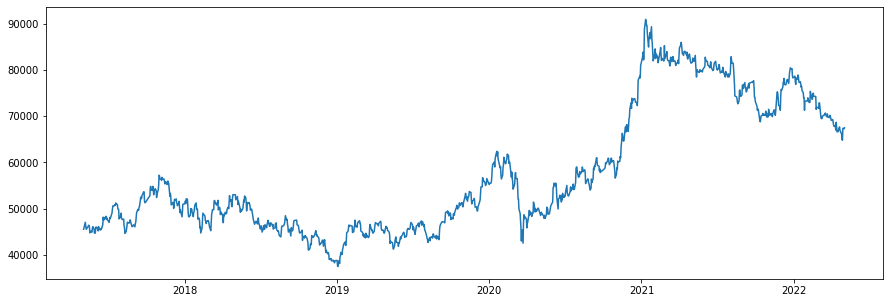

In [ ]:
rcParams['figure.figsize'] = 15, 5
plt.plot(samsung_ts)

## 📑 **(2) 각종 전처리 수행**

### 📌 **01_결측치 유무 확인**

- **결측치 유무 확인 및 시각화**  

Series([], Name: Close, dtype: float64)


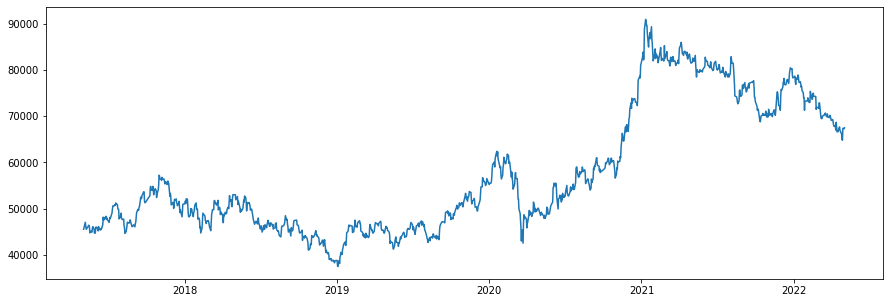

In [ ]:
# time을 기준으로 결측치 보간
samsung_ts = samsung_ts.interpolate(method='time')
# 결측치 확인
samsung_ts[samsung_ts.isna()]

print(samsung_ts[samsung_ts.isna()])
plt.plot(samsung_ts)

### 📌 **02_로그 변환**

- **로그 변환 및 시각화**

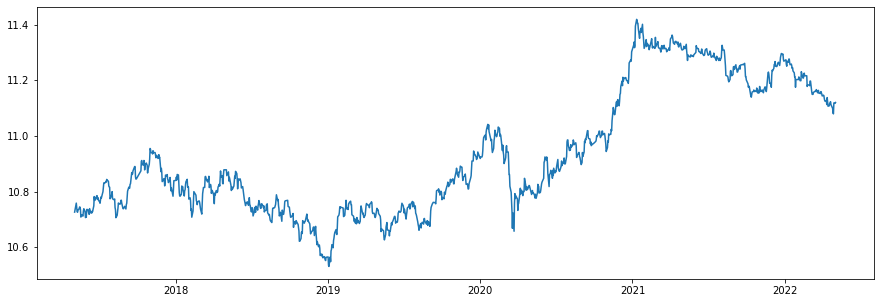

In [ ]:
samsung_ts_log = np.log(samsung_ts)
plt.plot(samsung_ts_log)

## 📑 **(3) 시계열 안정성 분석**

### 📌 **01_정성적 그래프 분석**

- **구간 통계치 시각화**  
원본시계열, 이동평균, 이동표준편차 시각화

In [ ]:
def plot_rolling_statistics(samsung_timeseries, window=12):

    # 이동평균 시계열
    rolmean = samsung_timeseries.rolling(window=window).mean()
    # 이동표준편차 시계열
    rolstd = samsung_timeseries.rolling(window=window).std()

    # 원본시계열, 이동평균, 이동표준편차 시각화
    orig = plt.plot(samsung_timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

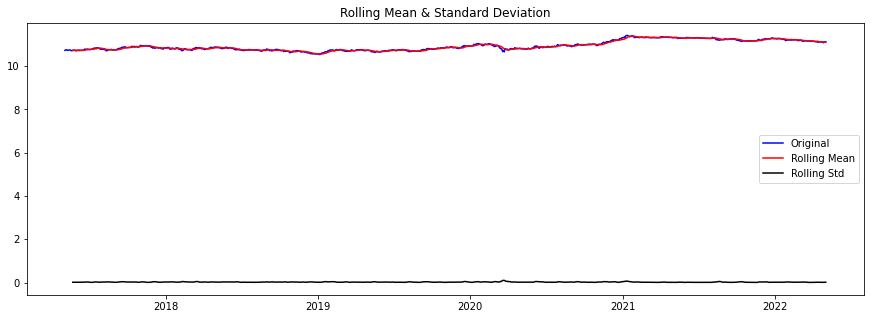

In [ ]:
plot_rolling_statistics(samsung_ts_log, window=12)

### 📌 **02_정량적 Augmented Dicky-Fuller Test**

- **adfuller 메서드 호출 및 리턴 값 출력**

In [ ]:
def augmented_dickey_fuller_test(samsung_timeseries):
    dftest = adfuller(samsung_timeseries, autolag='AIC')  
    
    # adfuller 리턴 결과
    print('Results of Dickey-Fuller Test:')
    samsung_dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        samsung_dfoutput['Critical Value (%s)' % key] = value
    print(samsung_dfoutput)

- **Augmented Dickey-Fuller Test**  
p-value : 0.625272  
p-value가 0에 가깝게 나오지 않았으므로 귀무가설 기각 불가 (안정적 시계열이 아님)

In [ ]:
augmented_dickey_fuller_test(samsung_ts_log)

Results of Dickey-Fuller Test:
Test Statistic                   -1.308505
p-value                           0.625272
#Lags Used                        0.000000
Number of Observations Used    1224.000000
Critical Value (1%)              -3.435704
Critical Value (5%)              -2.863904
Critical Value (10%)             -2.568029
dtype: float64


### 📌 **03_시계열 분해 (Time Series Decomposition)**

- **원본 시계열 에서 추세(trend), 계절성(Seasonality) 분리 및 시각화**  
그래프 사이즈 : 가로 10, 세로 5

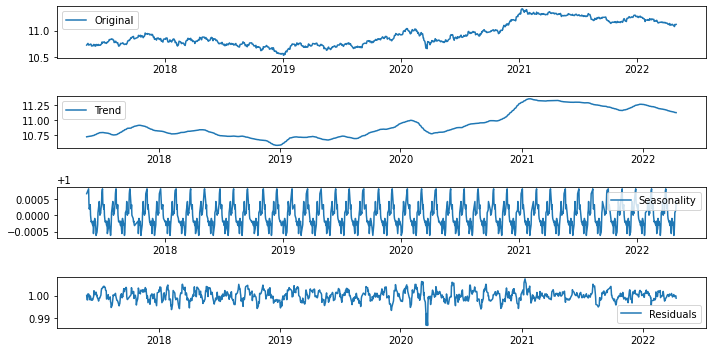

In [ ]:
samsung_decomposition = seasonal_decompose(samsung_ts_log, model='multiplicative', period = 30)

#추세
trend = samsung_decomposition.trend
#계절성
seasonal = samsung_decomposition.seasonal
# 로그 변환한 원본 - (추세 + 계절성)
residual = samsung_decomposition.resid

plt.rcParams["figure.figsize"] = (10,5)

plt.subplot(411)
plt.plot(samsung_ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

### 📌 **04_Residual 안정성 확인**

- **residual 안정성 여부 시각화**  
그래프 사이즈 : 가로 10, 세로 5

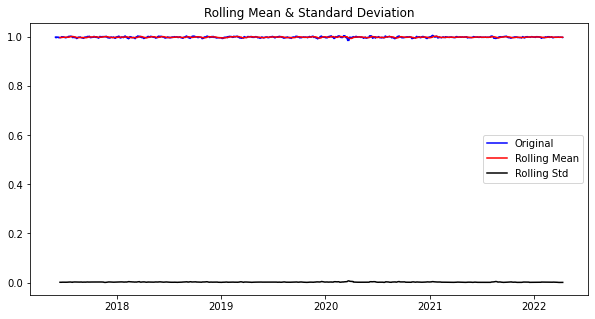

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
plot_rolling_statistics(residual)

- **Augmented Dickey-Fuller Test**  
p-value :  1.153880e-17  

In [ ]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.008617e+01
p-value                        1.153880e-17
#Lags Used                     1.900000e+01
Number of Observations Used    1.175000e+03
Critical Value (1%)           -3.435928e+00
Critical Value (5%)           -2.864003e+00
Critical Value (10%)          -2.568081e+00
dtype: float64


## 📑 **(4) 학습, 테스트 데이터셋 생성**

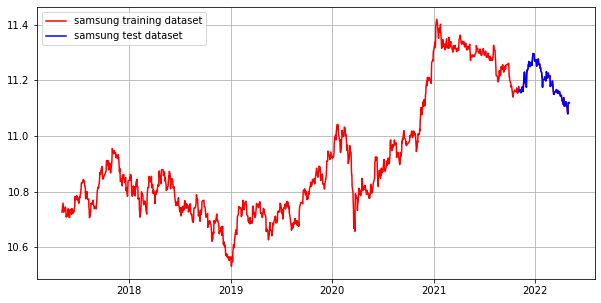

In [ ]:
samsung_train_data, samsung_test_data = samsung_ts_log[:int(len(samsung_ts_log)*0.9)], samsung_ts_log[int(len(samsung_ts_log)*0.9):]
plt.figure(figsize=(10,5))
plt.grid(True)

plt.plot(samsung_ts_log, c='r', label='samsung training dataset')
plt.plot(samsung_test_data, c='b', label='samsung test dataset')
plt.legend()

## 📑 **(5) 적정 ARIMA 모수 찾기**

### 📌 **01_ACF, PACF**

- **ACF (Autocorrelation)**  
MA 모델(이동평균) 시차 q 결정   
q는 ACF가 점차 감소하는 모양새로 적합한 값 없음 q=0 or 바꿔가면서 확인 필요  

- **PACF (Partial Autocorrelation)**  
AR 모델 (자기회귀) 시차 p 결정   
p가 2 이상인 구간에서 PACF 0에 근접하므로 p=1 적합  

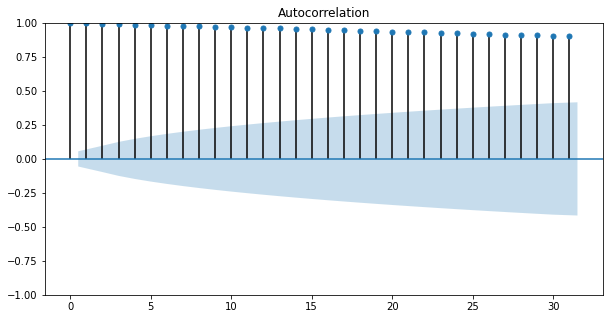

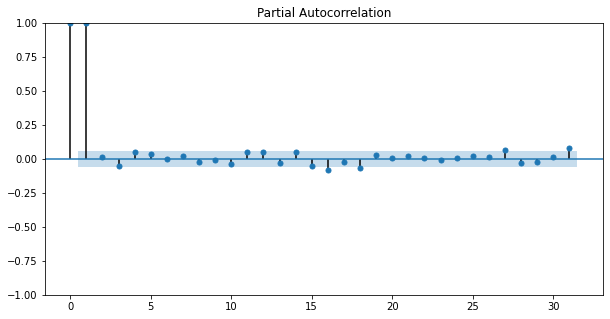

In [ ]:
# ACF (Autocorrelation)
plot_acf(samsung_ts_log)  

# PACF (Partial Autocorrelation)
plot_pacf(samsung_ts_log)

plt.show()

### 📌 **02_차분 안정성 확인**

- **1차 차분 및 2차 차분**  
diff_1 (Difference 1st)  

- 1차 차분이 더 안정적이지만 d 값도 q와 같이 값을 바꿔가며 최적의 값 확인

Results of Dickey-Fuller Test:
Test Statistic                  -34.802503
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1223.000000
Critical Value (1%)              -3.435708
Critical Value (5%)              -2.863906
Critical Value (10%)             -2.568030
dtype: float64


Results of Dickey-Fuller Test:
Test Statistic                -1.683303e+01
p-value                        1.153924e-29
#Lags Used                     1.500000e+01
Number of Observations Used    1.207000e+03
Critical Value (1%)           -3.435779e+00
Critical Value (5%)           -2.863938e+00
Critical Value (10%)          -2.568046e+00
dtype: float64


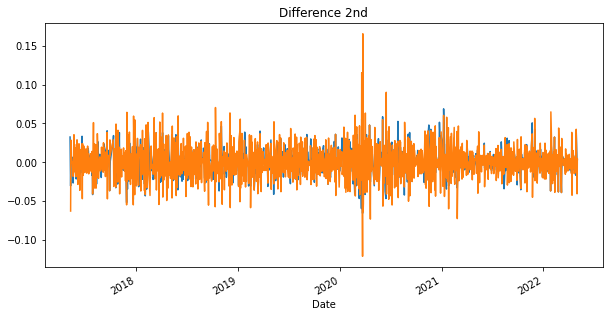

In [ ]:
diff_1 = samsung_ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

print('\n')

diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

## 📑 **(6) ARIMA 모델 훈련과 테스트**

### 📌 **01_ARIMA 모델 훈련**

- **ARIMA 모델 빌드 및 훈련**  

In [ ]:
samsung_model = ARIMA(samsung_train_data, order=(0, 1, 1))  
samsung_fitted_m = samsung_model.fit() 

print(samsung_fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1102
Model:                 ARIMA(0, 1, 1)   Log Likelihood                2941.034
Date:                Thu, 05 May 2022   AIC                          -5878.067
Time:                        07:33:30   BIC                          -5868.059
Sample:                             0   HQIC                         -5874.282
                               - 1102                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0111      0.022      0.503      0.615      -0.032       0.054
sigma2         0.0003   8.72e-06     32.111      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.02   Jarque-

### 📌 **02_모델 테스트 및 플로팅**

- **forecast() 메소드 활용**

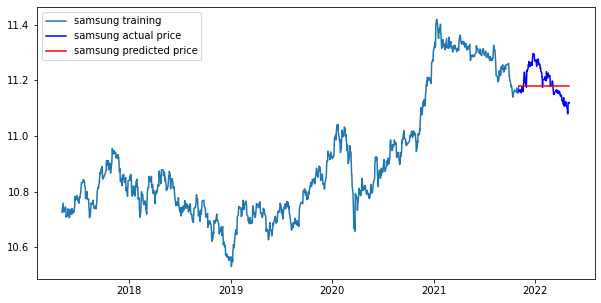

In [ ]:
samsung_fc= samsung_fitted_m.forecast(len(samsung_test_data), alpha=0.05)
samsung_fc = np.array(samsung_fc)

# 예측결과
samsung_fc_series = pd.Series(samsung_fc, index=samsung_test_data.index)

# 시각화
plt.plot(samsung_train_data, label='samsung training')
plt.plot(samsung_test_data, c='b', label='samsung actual price')
plt.plot(samsung_fc_series, c='r',label='samsung predicted price')
plt.legend()
plt.show()

### 📌 **03_최종 예측 모델 정확도 측정**

In [ ]:
mse = mean_squared_error(np.exp(samsung_test_data), np.exp(samsung_fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(samsung_test_data), np.exp(samsung_fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(samsung_test_data), np.exp(samsung_fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(samsung_fc) - np.exp(samsung_test_data))/np.abs(np.exp(samsung_test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  17057547.79073569
MAE:  3436.085485107132
RMSE:  4130.078424283937
MAPE: 4.65%


<hr>

# 📕  **EXPLORATION 03-3 :  APPLE 주식 예측**

## 📑 **(1) 시계열 데이터 준비**

### 📌 **01_모듈 import**

- **상단의 주식 예측과 동일한 모듈 사용으로 생략**  


### 📌 **02_시계열 생성**

- **데이터 import: pandas를 활용한 csv 파일 불러오기**  
- **컬럼 확인**  
(6개 : Date, Open, High, Low, Close, Adj, Close, Volume)  

In [ ]:
apple_dataset = 'https://raw.githubusercontent.com/9645258/aiffel/exploration/E-03/apple.csv'
apple_df = pd.read_csv(apple_dataset)
print(type(apple_df))
apple_df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-05-04,36.630001,36.785000,36.452499,36.632500,34.586941,93487600
1,2017-05-05,36.689999,37.244999,36.689999,37.240002,35.160515,109310800
2,2017-05-08,37.257500,38.424999,37.257500,38.252499,36.116478,195009600
3,2017-05-09,38.467499,38.720001,38.362499,38.497501,36.347801,156521600
4,2017-05-10,38.407501,38.485001,38.027500,38.314999,36.175480,103222800


- **Date 컬럼을 index로 활용해 시계열 생성**  

In [ ]:
apple_df = pd.read_csv(apple_dataset, index_col='Date', parse_dates=True)
apple_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-05-04,36.630001,36.785000,36.452499,36.632500,34.586941,93487600
2017-05-05,36.689999,37.244999,36.689999,37.240002,35.160515,109310800
2017-05-08,37.257500,38.424999,37.257500,38.252499,36.116478,195009600
2017-05-09,38.467499,38.720001,38.362499,38.497501,36.347801,156521600
2017-05-10,38.407501,38.485001,38.027500,38.314999,36.175480,103222800


- **6개 컬럼 중 1개의 컬럼(Close)만 사용**  

In [ ]:
apple_ts = apple_df['Close']
print(type(apple_ts))
apple_ts.head()

<class 'pandas.core.series.Series'>


Date
2017-05-04    36.632500
2017-05-05    37.240002
2017-05-08    38.252499
2017-05-09    38.497501
2017-05-10    38.314999
Name: Close, dtype: float64

- **데이터 시각화**  
그래프 사이즈: 가로: 15, 세로: 5  

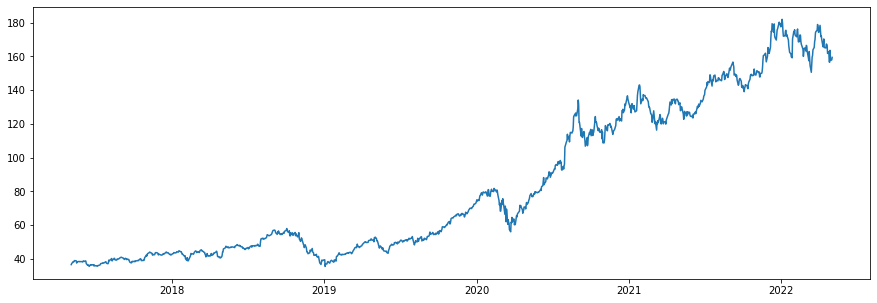

In [ ]:
rcParams['figure.figsize'] = 15, 5
plt.plot(apple_ts)

## 📑 **(2) 각종 전처리 수행**

### 📌 **01_결측치 유무 확인**

- **결측치 유무 확인 및 시각화**  

Series([], Name: Close, dtype: float64)


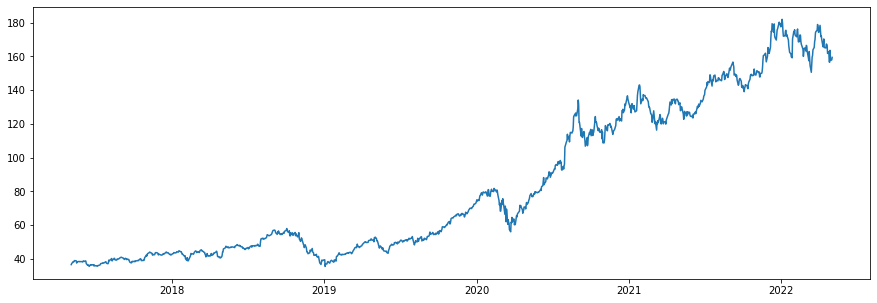

In [ ]:
# time을 기준으로 결측치 보간
apple_ts = apple_ts.interpolate(method='time')
# 결측치 확인
apple_ts[apple_ts.isna()]

print(apple_ts[apple_ts.isna()])
plt.plot(apple_ts)

### 📌 **02_로그 변환**

- **로그 변환 및 시각화**

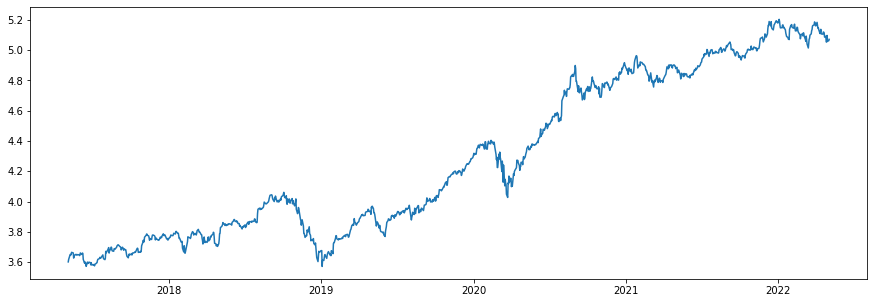

In [ ]:
apple_ts_log = np.log(apple_ts)
plt.plot(apple_ts_log)

## 📑 **(3) 시계열 안정성 분석**

### 📌 **01_정성적 그래프 분석**

- **구간 통계치 시각화**  
원본시계열, 이동평균, 이동표준편차 시각화

In [ ]:
def plot_rolling_statistics(apple_timeseries, window=12):

    # 이동평균 시계열
    rolmean = apple_timeseries.rolling(window=window).mean()
    # 이동표준편차 시계열
    rolstd = apple_timeseries.rolling(window=window).std()

    # 원본시계열, 이동평균, 이동표준편차 시각화
    orig = plt.plot(apple_timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

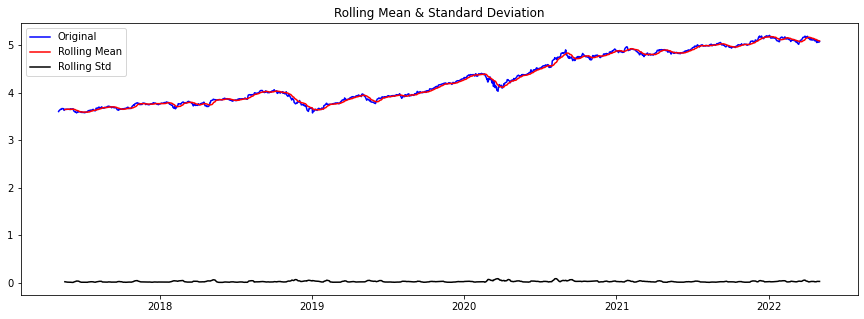

In [ ]:
plot_rolling_statistics(apple_ts_log, window=12)

### 📌 **02_정량적 Augmented Dicky-Fuller Test**

- **adfuller 메서드 호출 및 리턴 값 출력**

In [ ]:
def augmented_dickey_fuller_test(apple_timeseries):
    dftest = adfuller(apple_timeseries, autolag='AIC')  
    
    # adfuller 리턴 결과
    print('Results of Dickey-Fuller Test:')
    apple_dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        apple_dfoutput['Critical Value (%s)' % key] = value
    print(apple_dfoutput)

- **Augmented Dickey-Fuller Test**  
p-value : 0.913606  
p-value가 0에 가깝게 나오지 않았으므로 귀무가설 기각 불가 (안정적 시계열이 아님)

In [ ]:
augmented_dickey_fuller_test(apple_ts_log)

Results of Dickey-Fuller Test:
Test Statistic                   -0.378631
p-value                           0.913606
#Lags Used                        9.000000
Number of Observations Used    1249.000000
Critical Value (1%)              -3.435596
Critical Value (5%)              -2.863857
Critical Value (10%)             -2.568004
dtype: float64


### 📌 **03_시계열 분해 (Time Series Decomposition)**

- **원본 시계열 에서 추세(trend), 계절성(Seasonality) 분리 및 시각화**  
그래프 사이즈 : 가로 10, 세로 5

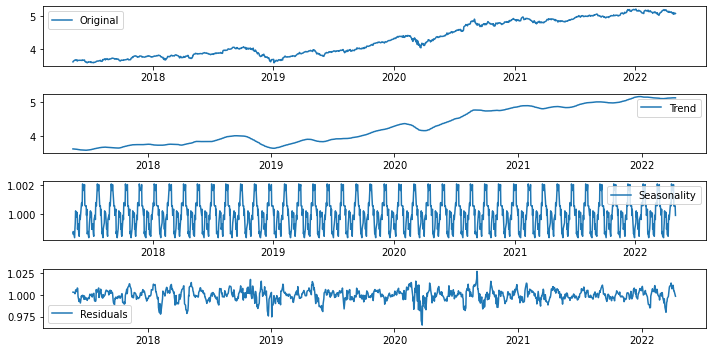

In [ ]:
decomposition = seasonal_decompose(apple_ts_log, model='multiplicative', period = 30)

#추세
trend = decomposition.trend
#계절성
seasonal = decomposition.seasonal
# 로그 변환한 원본 - (추세 + 계절성)
residual = decomposition.resid

plt.rcParams["figure.figsize"] = (10,5)

plt.subplot(411)
plt.plot(apple_ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

### 📌 **04_Residual 안정성 확인**

- **residual 안정성 여부 시각화**  
그래프 사이즈 : 가로 10, 세로 5

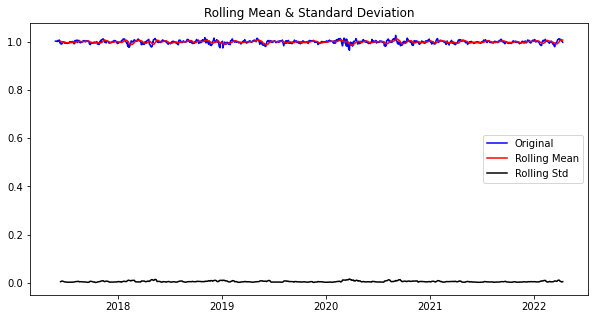

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
plot_rolling_statistics(residual)

- **Augmented Dickey-Fuller Test**  
p-value :  2.855114e-16  

In [ ]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -9.533139e+00
p-value                        2.855114e-16
#Lags Used                     1.900000e+01
Number of Observations Used    1.209000e+03
Critical Value (1%)           -3.435770e+00
Critical Value (5%)           -2.863934e+00
Critical Value (10%)          -2.568044e+00
dtype: float64


## 📑 **(4) 학습, 테스트 데이터셋 생성**

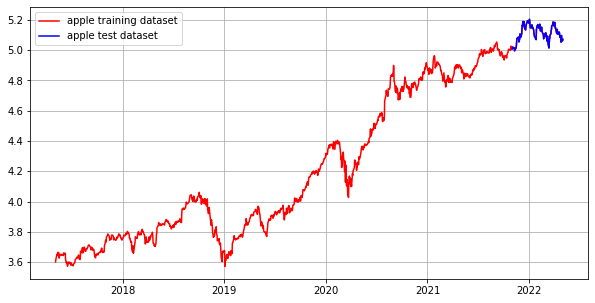

In [ ]:
apple_train_data, apple_test_data = apple_ts_log[:int(len(apple_ts_log)*0.9)], apple_ts_log[int(len(apple_ts_log)*0.9):]
plt.figure(figsize=(10,5))
plt.grid(True)

# 자연스러운 연출
plt.plot(apple_ts_log, c='r', label='apple training dataset')
plt.plot(apple_test_data, c='b', label='apple test dataset')
plt.legend()

## 📑 **(5) 적정 ARIMA 모수 찾기**

### 📌 **01_ACF, PACF**

- **ACF (Autocorrelation)**  
MA 모델(이동평균) 시차 q 결정   
q는 ACF가 점차 감소하는 모양새로 적합한 값 없음 q=0 or 바꿔가면서 확인 필요  

- **PACF (Partial Autocorrelation)**  
AR 모델 (자기회귀) 시차 p 결정   
p가 2 이상인 구간에서 PACF 0에 근접하므로 p=1 적합  

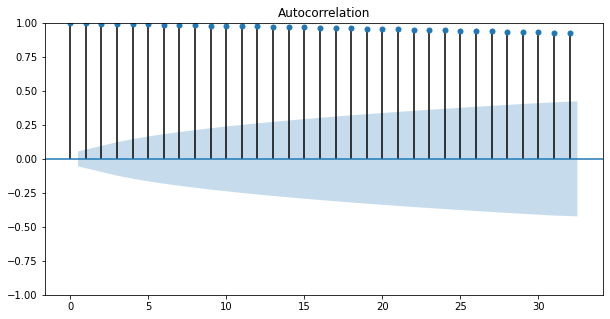

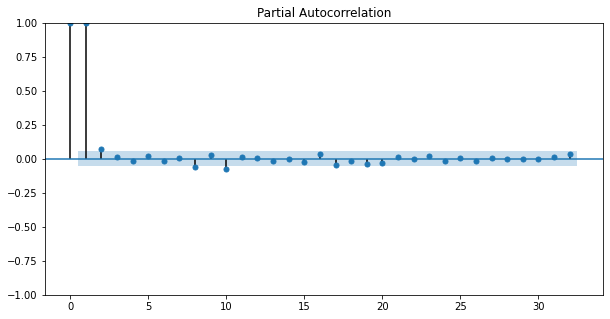

In [ ]:
# ACF (Autocorrelation)
plot_acf(apple_ts_log)  

# PACF (Partial Autocorrelation)
plot_pacf(apple_ts_log)

plt.show()

### 📌 **02_차분 안정성 확인**

- **1차 차분 및 2차 차분**  
diff_1 (Difference 1st)  

- 1차 차분이 더 안정적이지만 d 값도 q와 같이 값을 바꿔가며 최적의 값 확인  

Results of Dickey-Fuller Test:
Test Statistic                -1.124729e+01
p-value                        1.746866e-20
#Lags Used                     8.000000e+00
Number of Observations Used    1.249000e+03
Critical Value (1%)           -3.435596e+00
Critical Value (5%)           -2.863857e+00
Critical Value (10%)          -2.568004e+00
dtype: float64


Results of Dickey-Fuller Test:
Test Statistic                -1.524097e+01
p-value                        5.163539e-28
#Lags Used                     1.700000e+01
Number of Observations Used    1.239000e+03
Critical Value (1%)           -3.435639e+00
Critical Value (5%)           -2.863876e+00
Critical Value (10%)          -2.568013e+00
dtype: float64


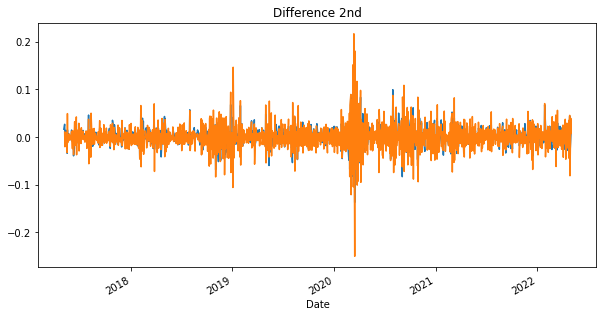

In [ ]:
diff_1 = apple_ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

print('\n')

diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

## 📑 **(6) ARIMA 모델 훈련과 테스트**

### 📌 **01_ARIMA 모델 훈련**

- **ARIMA 모델 빌드 및 훈련**  

In [ ]:
apple_model = ARIMA(apple_train_data, order=(0, 1, 1))  
apple_fitted_m = apple_model.fit() 

print(apple_fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1133
Model:                 ARIMA(0, 1, 1)   Log Likelihood                2838.214
Date:                Thu, 05 May 2022   AIC                          -5672.429
Time:                        07:33:37   BIC                          -5662.365
Sample:                             0   HQIC                         -5668.627
                               - 1133                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1283      0.019     -6.861      0.000      -0.165      -0.092
sigma2         0.0004   8.79e-06     44.215      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.02   Jarque-

### 📌 **02_모델 테스트 및 플로팅**

- **forecast() 메소드 활용**

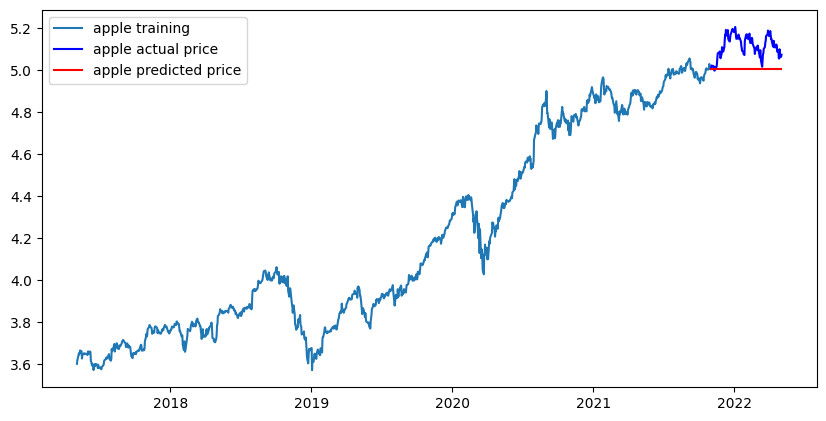

In [ ]:
apple_fc= apple_fitted_m.forecast(len(apple_test_data), alpha=0.05)
apple_fc = np.array(apple_fc)

# 예측결과
apple_fc_series = pd.Series(apple_fc, index=apple_test_data.index)

# 시각화
plt.figure(figsize=(10,5), dpi=100)
plt.plot(apple_train_data, label='apple training')
plt.plot(apple_test_data, c='b', label='apple actual price')
plt.plot(apple_fc_series, c='r',label='apple predicted price')
plt.legend()
plt.show()

### 📌 **03_최종 예측 모델 정확도 측정**

In [ ]:
mse = mean_squared_error(np.exp(apple_test_data), np.exp(apple_fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(apple_test_data), np.exp(apple_fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(apple_test_data), np.exp(apple_fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(apple_fc) - np.exp(apple_test_data))/np.abs(np.exp(apple_test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  377.54922615225223
MAE:  17.509585137392413
RMSE:  19.43062598457014
MAPE: 10.28%


<hr>

# 📕  **EXPLORATION 03-4 :  XIAOMI 주식 예측**

## 📑 **(1) 시계열 데이터 준비**

### 📌 **01_모듈 import**

- **상단의 주식 예측과 동일한 모듈 사용으로 생략**  


### 📌 **02_시계열 생성**

- **데이터 import: pandas를 활용한 csv 파일 불러오기**  
- **컬럼 확인**  
(6개 : Date, Open, High, Low, Close, Adj, Close, Volume)  

In [ ]:
mi_dataset = 'https://raw.githubusercontent.com/9645258/aiffel/exploration/E-03/mi.csv'
mi_df = pd.read_csv(mi_dataset)
print(type(mi_df))
mi_df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-07-09,16.6,17.000000,16.000000,16.799999,16.799999,462182642
1,2018-07-10,17.0,19.340000,17.000000,19.000000,19.000000,534072218
2,2018-07-11,18.5,19.799999,18.299999,19.000000,19.000000,374721138
3,2018-07-12,19.4,19.700001,19.020000,19.260000,19.260000,132592630
4,2018-07-13,19.6,21.799999,19.520000,21.450001,21.450001,364065075


- **Date 컬럼을 index로 활용해 시계열 생성**  

In [ ]:
mi_df = pd.read_csv(mi_dataset, index_col='Date', parse_dates=True)
mi_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-09,16.6,17.000000,16.000000,16.799999,16.799999,462182642
2018-07-10,17.0,19.340000,17.000000,19.000000,19.000000,534072218
2018-07-11,18.5,19.799999,18.299999,19.000000,19.000000,374721138
2018-07-12,19.4,19.700001,19.020000,19.260000,19.260000,132592630
2018-07-13,19.6,21.799999,19.520000,21.450001,21.450001,364065075


- **6개 컬럼 중 1개의 컬럼(Close)만 사용**  

In [ ]:
mi_ts = mi_df['Close']
print(type(mi_ts))
mi_ts.head()

<class 'pandas.core.series.Series'>


Date
2018-07-09    16.799999
2018-07-10    19.000000
2018-07-11    19.000000
2018-07-12    19.260000
2018-07-13    21.450001
Name: Close, dtype: float64

- **데이터 시각화**  
그래프 사이즈: 가로: 15, 세로: 5  

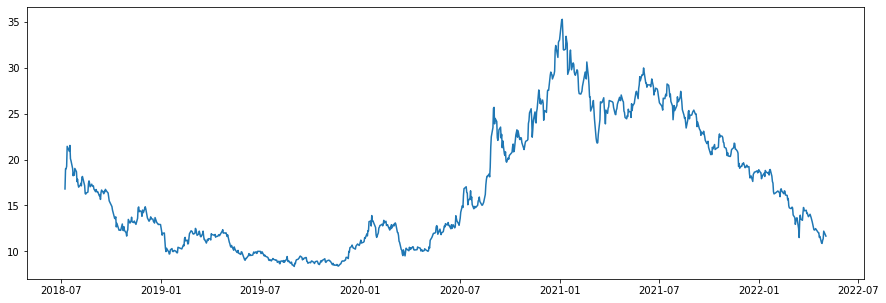

In [ ]:
rcParams['figure.figsize'] = 15, 5
plt.plot(mi_ts)

## 📑 **(2) 각종 전처리 수행**

### 📌 **01_결측치 유무 확인**

- **결측치 유무 확인 및 시각화**  

Series([], Name: Close, dtype: float64)


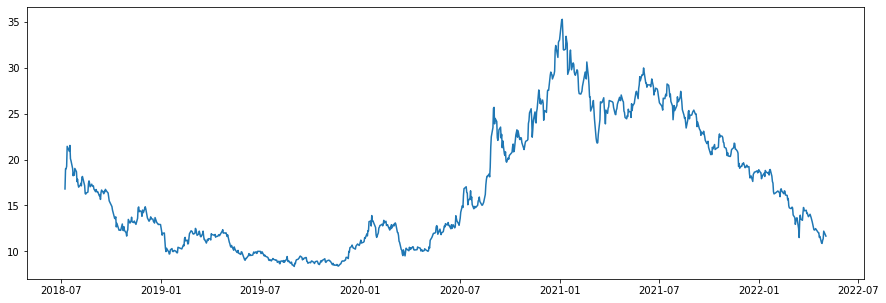

In [ ]:
# time을 기준으로 결측치 보간
mi_ts = mi_ts.interpolate(method='time')
# 결측치 확인
mi_ts[mi_ts.isna()]

print(mi_ts[mi_ts.isna()])
plt.plot(mi_ts)

### 📌 **02_로그 변환**

- **로그 변환 및 시각화**

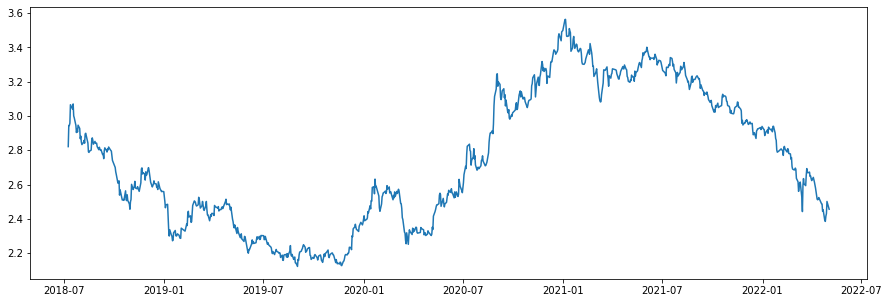

In [ ]:
mi_ts_log = np.log(mi_ts)
plt.plot(mi_ts_log)

## 📑 **(3) 시계열 안정성 분석**

### 📌 **01_정성적 그래프 분석**

- **구간 통계치 시각화**  
원본시계열, 이동평균, 이동표준편차 시각화

In [ ]:
def plot_rolling_statistics(mi_timeseries, window=12):

    # 이동평균 시계열
    rolmean = mi_timeseries.rolling(window=window).mean()
    # 이동표준편차 시계열
    rolstd = mi_timeseries.rolling(window=window).std()

    # 원본시계열, 이동평균, 이동표준편차 시각화
    orig = plt.plot(mi_timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

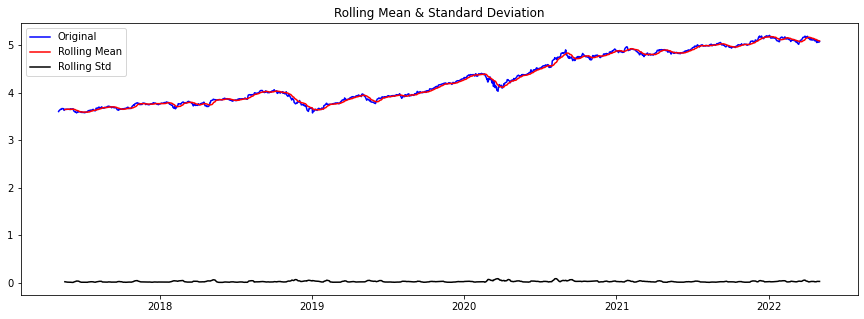

In [ ]:
plot_rolling_statistics(apple_ts_log, window=12)

### 📌 **02_정량적 Augmented Dicky-Fuller Test**

- **adfuller 메서드 호출 및 리턴 값 출력**

In [ ]:
def augmented_dickey_fuller_test(mi_timeseries):
    dftest = adfuller(mi_timeseries, autolag='AIC')  
    
    # adfuller 리턴 결과
    print('Results of Dickey-Fuller Test:')
    mi_dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        mi_dfoutput['Critical Value (%s)' % key] = value
    print(mi_dfoutput)

- **Augmented Dickey-Fuller Test**  
p-value : 0.738704  
p-value가 0에 가깝게 나오지 않았으므로 귀무가설 기각 불가 (안정적 시계열이 아님)

In [ ]:
augmented_dickey_fuller_test(mi_ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.039190
p-value                          0.738704
#Lags Used                       0.000000
Number of Observations Used    941.000000
Critical Value (1%)             -3.437318
Critical Value (5%)             -2.864616
Critical Value (10%)            -2.568408
dtype: float64


### 📌 **03_시계열 분해 (Time Series Decomposition)**

- **원본 시계열 에서 추세(trend), 계절성(Seasonality) 분리 및 시각화**  
그래프 사이즈 : 가로 10, 세로 5

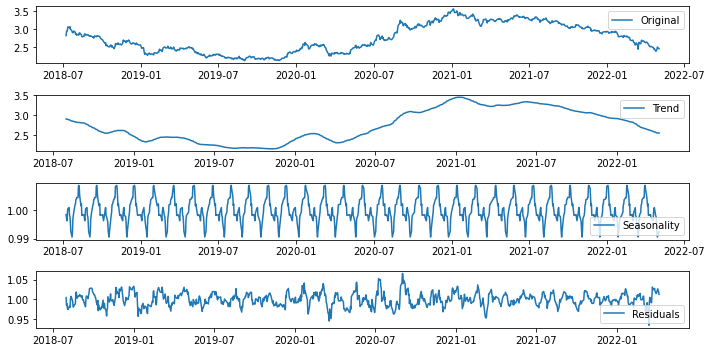

In [ ]:
decomposition = seasonal_decompose(mi_ts_log, model='multiplicative', period = 30)

#추세
trend = decomposition.trend
#계절성
seasonal = decomposition.seasonal
# 로그 변환한 원본 - (추세 + 계절성)
residual = decomposition.resid

plt.rcParams["figure.figsize"] = (10,5)

plt.subplot(411)
plt.plot(mi_ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

### 📌 **04_Residual 안정성 확인**

- **residual 안정성 여부 시각화**  
그래프 사이즈 : 가로 10, 세로 5

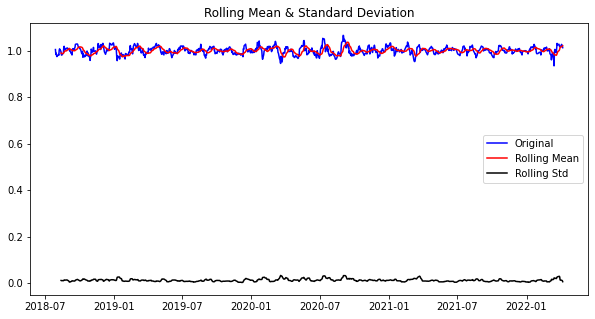

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
plot_rolling_statistics(residual)

- **Augmented Dickey-Fuller Test**  
p-value :  8.970922e-15  

In [ ]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -8.946274e+00
p-value                        8.970922e-15
#Lags Used                     2.100000e+01
Number of Observations Used    8.900000e+02
Critical Value (1%)           -3.437719e+00
Critical Value (5%)           -2.864793e+00
Critical Value (10%)          -2.568502e+00
dtype: float64


## 📑 **(4) 학습, 테스트 데이터셋 생성**

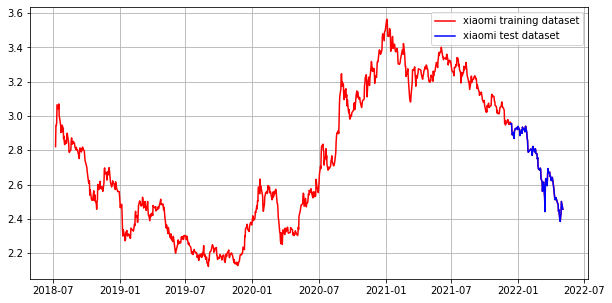

In [ ]:
mi_train_data, mi_test_data = mi_ts_log[:int(len(mi_ts_log)*0.9)], mi_ts_log[int(len(mi_ts_log)*0.9):]
plt.figure(figsize=(10,5))
plt.grid(True)

# 자연스러운 연출
plt.plot(mi_ts_log, c='r', label='xiaomi training dataset')
plt.plot(mi_test_data, c='b', label='xiaomi test dataset')
plt.legend()

## 📑 **(5) 적정 ARIMA 모수 찾기**

### 📌 **01_ACF, PACF**

- **ACF (Autocorrelation)**  
MA 모델(이동평균) 시차 q 결정   
q는 ACF가 점차 감소하는 모양새로 적합한 값 없음 q=0 or 바꿔가면서 확인 필요  

- **PACF (Partial Autocorrelation)**  
AR 모델 (자기회귀) 시차 p 결정   
p가 2 이상인 구간에서 PACF 0에 근접하므로 p=1 적합  

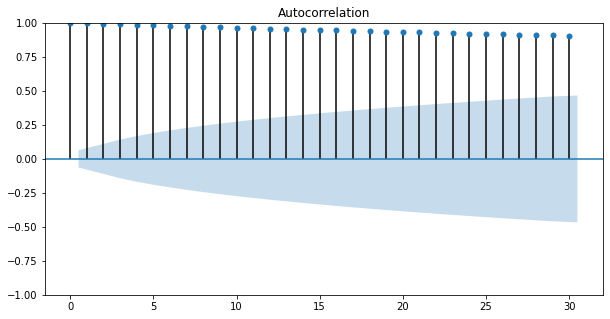

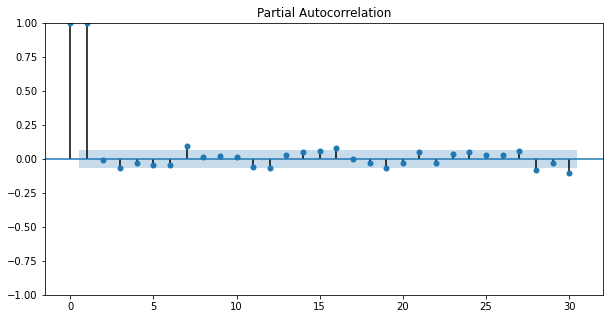

In [ ]:
# ACF (Autocorrelation)
plot_acf(mi_ts_log)  

# PACF (Partial Autocorrelation)
plot_pacf(mi_ts_log)

plt.show()

### 📌 **02_차분 안정성 확인**

- **1차 차분 및 2차 차분**  
diff_1 (Difference 1st)  

- 1차 차분이 더 안정적이지만 d 값도 q와 같이 값을 바꿔가며 최적의 값 확인  

Results of Dickey-Fuller Test:
Test Statistic                 -30.542013
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    940.000000
Critical Value (1%)             -3.437326
Critical Value (5%)             -2.864620
Critical Value (10%)            -2.568410
dtype: float64


Results of Dickey-Fuller Test:
Test Statistic                -1.187522e+01
p-value                        6.364636e-22
#Lags Used                     1.900000e+01
Number of Observations Used    9.200000e+02
Critical Value (1%)           -3.437478e+00
Critical Value (5%)           -2.864687e+00
Critical Value (10%)          -2.568445e+00
dtype: float64


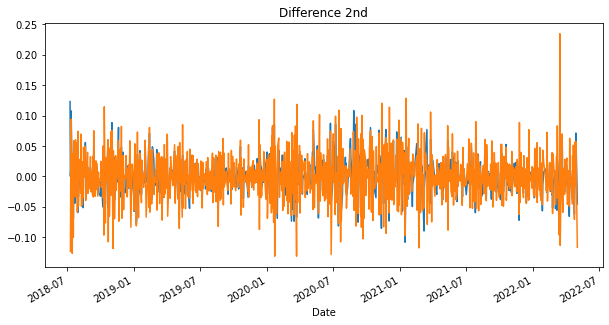

In [ ]:
diff_1 = mi_ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

print('\n')

diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

## 📑 **(6) ARIMA 모델 훈련과 테스트**

### 📌 **01_ARIMA 모델 훈련**

- **ARIMA 모델 빌드 및 훈련**  

In [ ]:
mi_model = ARIMA(mi_train_data, order=(0, 2, 25))  
mi_fitted_m = mi_model.fit() 

print(mi_fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  847
Model:                ARIMA(0, 2, 25)   Log Likelihood                1790.385
Date:                Thu, 05 May 2022   AIC                          -3528.769
Time:                        07:34:39   BIC                          -3405.547
Sample:                             0   HQIC                         -3481.555
                                - 847                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9911      0.033    -29.693      0.000      -1.056      -0.926
ma.L2          0.0443      0.045      0.984      0.325      -0.044       0.133
ma.L3         -0.0208      0.046     -0.457      0.6

### 📌 **02_모델 테스트 및 플로팅**

- **forecast() 메소드 활용**

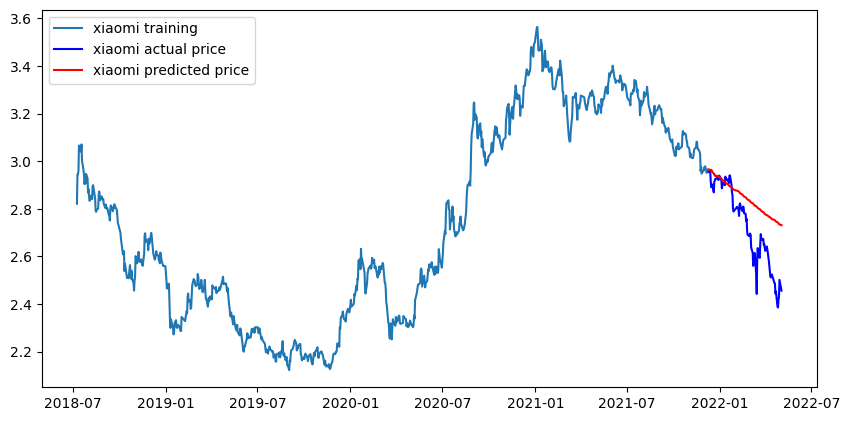

In [ ]:
mi_fc= mi_fitted_m.forecast(len(mi_test_data), alpha=0.05)
mi_fc = np.array(mi_fc)

# 예측결과
mi_fc_series = pd.Series(mi_fc, index=mi_test_data.index)

# 시각화
plt.figure(figsize=(10,5), dpi=100)
plt.plot(mi_train_data, label='xiaomi training')
plt.plot(mi_test_data, c='b', label='xiaomi actual price')
plt.plot(mi_fc_series, c='r',label='xiaomi predicted price')
plt.legend()
plt.show()

### 📌 **03_최종 예측 모델 정확도 측정**

In [ ]:
mse = mean_squared_error(np.exp(mi_test_data), np.exp(mi_fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(mi_test_data), np.exp(mi_fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(mi_test_data), np.exp(mi_fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(mi_fc) - np.exp(mi_test_data))/np.abs(np.exp(mi_test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  4.995119958521685
MAE:  1.788652645728554
RMSE:  2.23497650066431
MAPE: 13.25%


<hr>

# 📕  **EXPLORATION 03-5 :  NOKIA 주식 예측**

## 📑 **(1) 시계열 데이터 준비**

### 📌 **01_모듈 import**

- **상단의 주식 예측과 동일한 모듈 사용으로 생략**  


### 📌 **02_시계열 생성**

- **데이터 import: pandas를 활용한 csv 파일 불러오기**  
- **컬럼 확인**  
(6개 : Date, Open, High, Low, Close, Adj, Close, Volume)  

In [ ]:
nok_dataset = 'https://raw.githubusercontent.com/9645258/aiffel/exploration/E-03/nok.csv'
nok_df = pd.read_csv(nok_dataset)
print(type(nok_df))
nok_df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-05-04,5.97,6.03,5.97,6.03,5.491137,19677700
1,2017-05-05,6.11,6.19,6.09,6.18,5.627732,30516400
2,2017-05-08,6.08,6.15,6.07,6.13,5.582201,19731500
3,2017-05-09,6.14,6.19,6.13,6.18,5.627732,17102600
4,2017-05-10,6.09,6.15,6.07,6.14,5.591307,22213800


- **Date 컬럼을 index로 활용해 시계열 생성**  

In [ ]:
nok_df = pd.read_csv(nok_dataset, index_col='Date', parse_dates=True)
nok_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-05-04,5.97,6.03,5.97,6.03,5.491137,19677700
2017-05-05,6.11,6.19,6.09,6.18,5.627732,30516400
2017-05-08,6.08,6.15,6.07,6.13,5.582201,19731500
2017-05-09,6.14,6.19,6.13,6.18,5.627732,17102600
2017-05-10,6.09,6.15,6.07,6.14,5.591307,22213800


- **6개 컬럼 중 1개의 컬럼(Close)만 사용**  

In [ ]:
nok_ts = nok_df['Close']
print(type(nok_ts))
nok_ts.head()

<class 'pandas.core.series.Series'>


Date
2017-05-04    6.03
2017-05-05    6.18
2017-05-08    6.13
2017-05-09    6.18
2017-05-10    6.14
Name: Close, dtype: float64

- **데이터 시각화**  
그래프 사이즈: 가로: 15, 세로: 5  

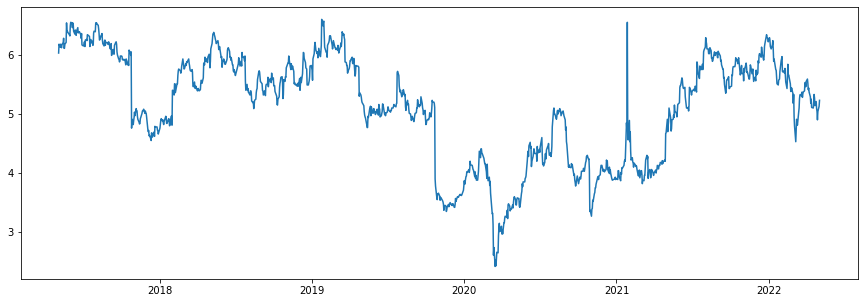

In [ ]:
rcParams['figure.figsize'] = 15, 5
plt.plot(nok_ts)

## 📑 **(2) 각종 전처리 수행**

### 📌 **01_결측치 유무 확인**

- **결측치 유무 확인 및 시각화**  

Series([], Name: Close, dtype: float64)


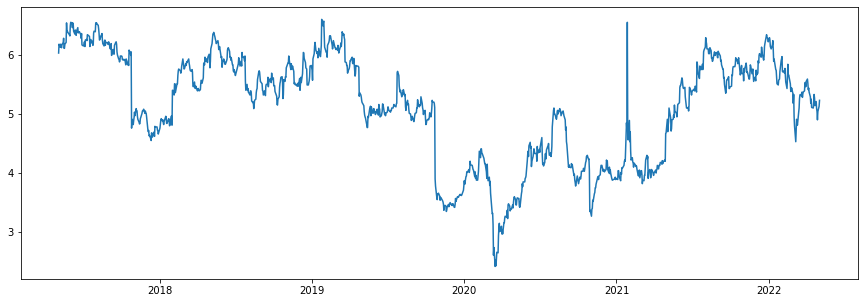

In [ ]:
# time을 기준으로 결측치 보간
nok_ts = nok_ts.interpolate(method='time')
# 결측치 확인
nok_ts[nok_ts.isna()]

print(nok_ts[nok_ts.isna()])
plt.plot(nok_ts)

### 📌 **02_로그 변환**

- **로그 변환 및 시각화**

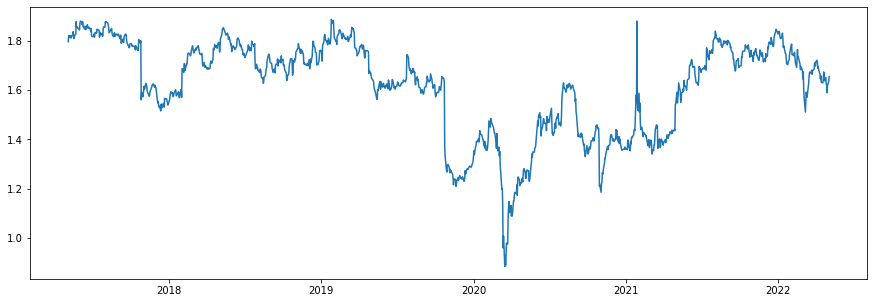

In [ ]:
nok_ts_log = np.log(nok_ts)
plt.plot(nok_ts_log)

## 📑 **(3) 시계열 안정성 분석**

### 📌 **01_정성적 그래프 분석**

- **구간 통계치 시각화**  
원본시계열, 이동평균, 이동표준편차 시각화

In [ ]:
def plot_rolling_statistics(nok_timeseries, window=12):

    # 이동평균 시계열
    rolmean = nok_timeseries.rolling(window=window).mean()
    # 이동표준편차 시계열
    rolstd = nok_timeseries.rolling(window=window).std()

    # 원본시계열, 이동평균, 이동표준편차 시각화
    orig = plt.plot(nok_timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

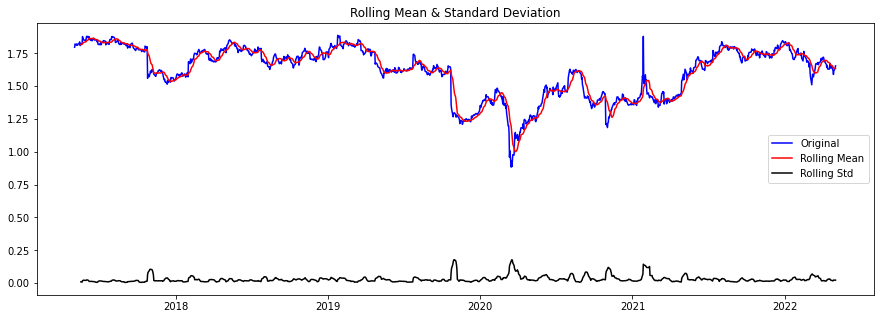

In [ ]:
plot_rolling_statistics(nok_ts_log, window=12)

### 📌 **02_정량적 Augmented Dicky-Fuller Test**

- **adfuller 메서드 호출 및 리턴 값 출력**

In [ ]:
def augmented_dickey_fuller_test(nok_timeseries):
    dftest = adfuller(nok_timeseries, autolag='AIC')  
    
    # adfuller 리턴 결과
    print('Results of Dickey-Fuller Test:')
    nok_dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        nok_dfoutput['Critical Value (%s)' % key] = value
    print(nok_dfoutput)

- **Augmented Dickey-Fuller Test**  
p-value : 0.099530  
p-value가 0에 가깝게 나오므로 귀무가설 기각 가능 (안정적 시계열)

In [ ]:
augmented_dickey_fuller_test(nok_ts_log)

Results of Dickey-Fuller Test:
Test Statistic                   -2.569209
p-value                           0.099530
#Lags Used                        4.000000
Number of Observations Used    1254.000000
Critical Value (1%)              -3.435575
Critical Value (5%)              -2.863848
Critical Value (10%)             -2.567999
dtype: float64


### 📌 **03_시계열 분해 (Time Series Decomposition)**

- **원본 시계열 에서 추세(trend), 계절성(Seasonality) 분리 및 시각화**  
그래프 사이즈 : 가로 10, 세로 5

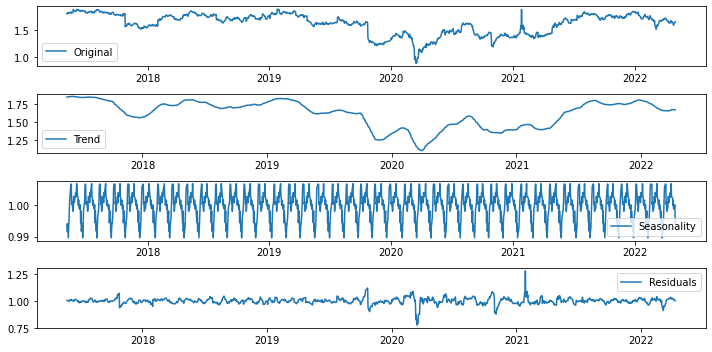

In [ ]:
decomposition = seasonal_decompose(nok_ts_log, model='multiplicative', period = 30)

#추세
trend = decomposition.trend
#계절성
seasonal = decomposition.seasonal
# 로그 변환한 원본 - (추세 + 계절성)
residual = decomposition.resid

plt.rcParams["figure.figsize"] = (10,5)

plt.subplot(411)
plt.plot(nok_ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

### 📌 **04_Residual 안정성 확인**

- **residual 안정성 여부 시각화**  
그래프 사이즈 : 가로 10, 세로 5

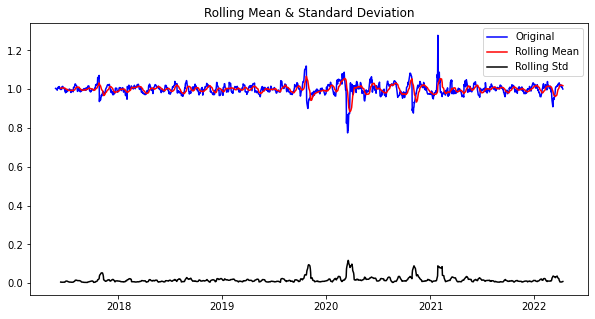

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
plot_rolling_statistics(residual)

- **Augmented Dickey-Fuller Test**  
p-value :  8.970922e-15  

In [ ]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.060821e+01
p-value                        5.926519e-19
#Lags Used                     2.000000e+01
Number of Observations Used    1.208000e+03
Critical Value (1%)           -3.435775e+00
Critical Value (5%)           -2.863936e+00
Critical Value (10%)          -2.568045e+00
dtype: float64


## 📑 **(4) 학습, 테스트 데이터셋 생성**

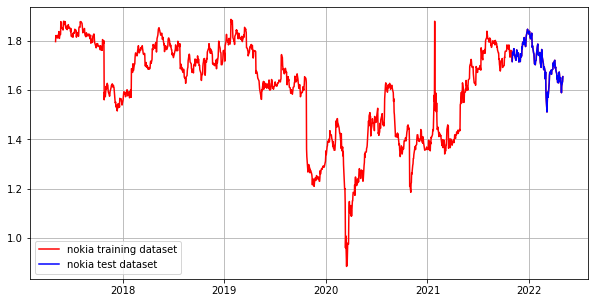

In [ ]:
nok_train_data, nok_test_data = nok_ts_log[:int(len(nok_ts_log)*0.9)], nok_ts_log[int(len(nok_ts_log)*0.9):]
plt.figure(figsize=(10,5))
plt.grid(True)

# 자연스러운 연출
plt.plot(nok_ts_log, c='r', label='nokia training dataset')
plt.plot(nok_test_data, c='b', label='nokia test dataset')
plt.legend()

## 📑 **(5) 적정 ARIMA 모수 찾기**

### 📌 **01_ACF, PACF**

- **ACF (Autocorrelation)**  
MA 모델(이동평균) 시차 q 결정   
q는 ACF가 점차 감소하는 모양새로 적합한 값 없음 q=0 or 바꿔가면서 확인 필요  

- **PACF (Partial Autocorrelation)**  
AR 모델 (자기회귀) 시차 p 결정   
p가 3 이상인 구간에서 PACF 0에 근접하므로 p=2 적합  

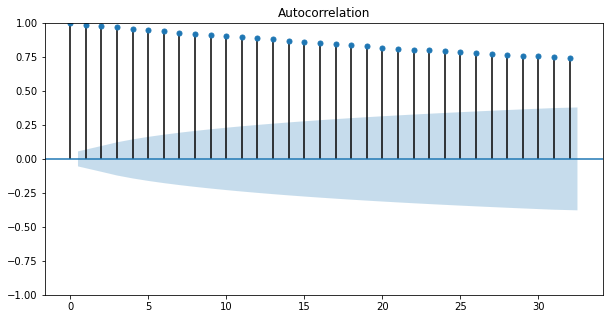

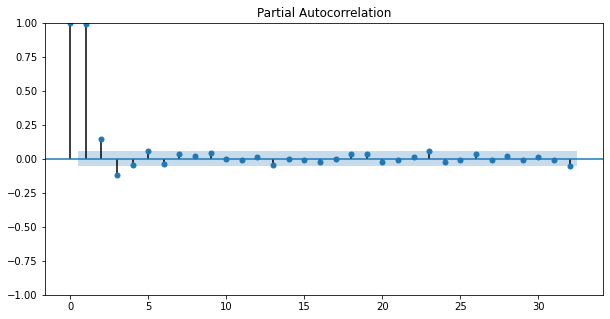

In [ ]:
# ACF (Autocorrelation)
plot_acf(nok_ts_log)  

# PACF (Partial Autocorrelation)
plot_pacf(nok_ts_log)

plt.show()

### 📌 **02_차분 안정성 확인**

- **1차 차분 및 2차 차분**  
diff_1 (Difference 1st)  

- 1차 차분과 2차 차분이 비슷하므로 d 값도 q와 같이 값을 바꿔가며 최적의 값 확인  

Results of Dickey-Fuller Test:
Test Statistic                -1.791023e+01
p-value                        2.931392e-30
#Lags Used                     3.000000e+00
Number of Observations Used    1.254000e+03
Critical Value (1%)           -3.435575e+00
Critical Value (5%)           -2.863848e+00
Critical Value (10%)          -2.567999e+00
dtype: float64


Results of Dickey-Fuller Test:
Test Statistic                -1.249969e+01
p-value                        2.824540e-23
#Lags Used                     2.200000e+01
Number of Observations Used    1.234000e+03
Critical Value (1%)           -3.435660e+00
Critical Value (5%)           -2.863885e+00
Critical Value (10%)          -2.568019e+00
dtype: float64


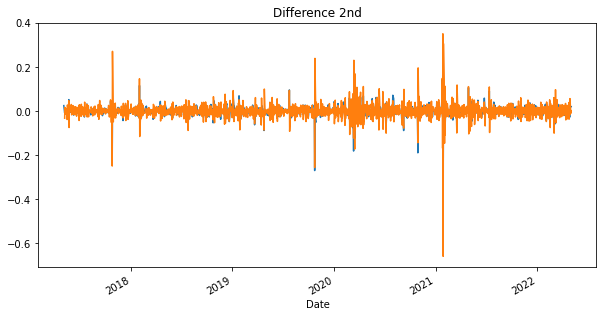

In [ ]:
diff_1 = nok_ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

print('\n')

diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

## 📑 **(6) ARIMA 모델 훈련과 테스트**

### 📌 **01_ARIMA 모델 훈련**

- **ARIMA 모델 빌드 및 훈련**  

In [ ]:
nok_model = ARIMA(nok_train_data, order=(0, 2, 1))  
nok_fitted_m = nok_model.fit() 

print(nok_fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1133
Model:                 ARIMA(0, 2, 1)   Log Likelihood                2411.556
Date:                Thu, 05 May 2022   AIC                          -4819.113
Time:                        07:34:47   BIC                          -4809.051
Sample:                             0   HQIC                         -4815.312
                               - 1133                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9998      0.031    -32.308      0.000      -1.060      -0.939
sigma2         0.0008   2.54e-05     32.195      0.000       0.001       0.001
Ljung-Box (L1) (Q):                  27.82   Jarque-

### 📌 **02_모델 테스트 및 플로팅**

- **forecast() 메소드 활용**

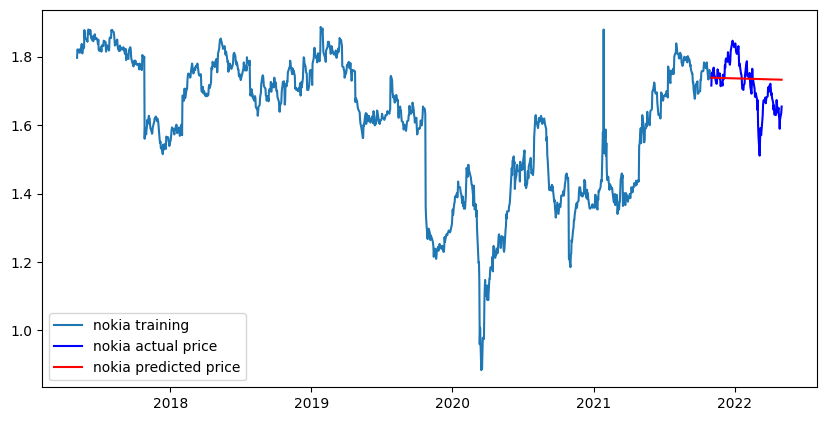

In [ ]:
nok_fc= nok_fitted_m.forecast(len(nok_test_data), alpha=0.05)
nok_fc = np.array(nok_fc)

# 예측결과
nok_fc_series = pd.Series(nok_fc, index=nok_test_data.index)

# 시각화
plt.figure(figsize=(10,5), dpi=100)
plt.plot(nok_train_data, label='nokia training')
plt.plot(nok_test_data, c='b', label='nokia actual price')
plt.plot(nok_fc_series, c='r',label='nokia predicted price')
plt.legend()
plt.show()

### 📌 **03_최종 예측 모델 정확도 측정**

In [ ]:
mse = mean_squared_error(np.exp(nok_test_data), np.exp(nok_fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(nok_test_data), np.exp(nok_fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(nok_test_data), np.exp(nok_fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(nok_fc) - np.exp(nok_test_data))/np.abs(np.exp(nok_test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  0.14679904263587457
MAE:  0.30166615311389805
RMSE:  0.3831436318613094
MAPE: 5.54%


<hr>

# 📕  **EXPLORATION 03-6 :  SONY 주식 예측**

## 📑 **(1) 시계열 데이터 준비**

### 📌 **01_모듈 import**

- **상단의 주식 예측과 동일한 모듈 사용으로 생략**  


### 📌 **02_시계열 생성**

- **데이터 import: pandas를 활용한 csv 파일 불러오기**  
- **컬럼 확인**  
(6개 : Date, Open, High, Low, Close, Adj, Close, Volume)  

In [ ]:
sony_dataset = 'https://raw.githubusercontent.com/9645258/aiffel/exploration/E-03/sony.csv'
sony_df = pd.read_csv(sony_dataset)
print(type(sony_df))
sony_df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-05-04,34.500000,34.610001,34.450001,34.590000,34.590000,657700
1,2017-05-05,34.500000,34.849998,34.500000,34.779999,34.779999,881500
2,2017-05-08,35.110001,35.259998,35.060001,35.160000,35.160000,828100
3,2017-05-09,35.330002,35.520000,35.330002,35.410000,35.410000,1016100
4,2017-05-10,35.720001,35.730000,35.560001,35.599998,35.599998,893900


- **Date 컬럼을 index로 활용해 시계열 생성**  

In [ ]:
sony_df = pd.read_csv(sony_dataset, index_col='Date', parse_dates=True)
sony_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-05-04,34.500000,34.610001,34.450001,34.590000,34.590000,657700
2017-05-05,34.500000,34.849998,34.500000,34.779999,34.779999,881500
2017-05-08,35.110001,35.259998,35.060001,35.160000,35.160000,828100
2017-05-09,35.330002,35.520000,35.330002,35.410000,35.410000,1016100
2017-05-10,35.720001,35.730000,35.560001,35.599998,35.599998,893900


- **6개 컬럼 중 1개의 컬럼(Close)만 사용**  

In [ ]:
sony_ts = sony_df['Close']
print(type(sony_ts))
sony_ts.head()

<class 'pandas.core.series.Series'>


Date
2017-05-04    34.590000
2017-05-05    34.779999
2017-05-08    35.160000
2017-05-09    35.410000
2017-05-10    35.599998
Name: Close, dtype: float64

- **데이터 시각화**  
그래프 사이즈: 가로: 15, 세로: 5  

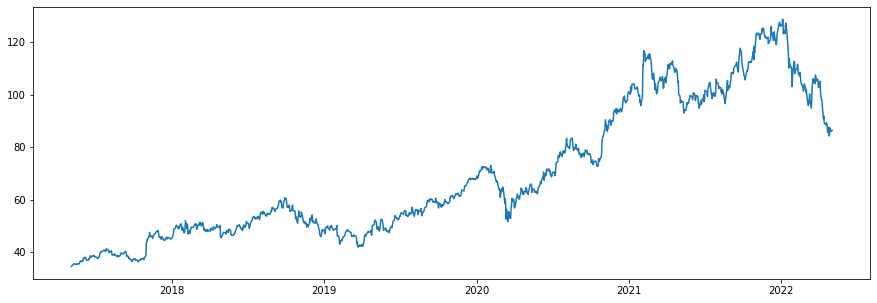

In [ ]:
rcParams['figure.figsize'] = 15, 5
plt.plot(sony_ts)

## 📑 **(2) 각종 전처리 수행**

### 📌 **01_결측치 유무 확인**

- **결측치 유무 확인 및 시각화**  

Series([], Name: Close, dtype: float64)


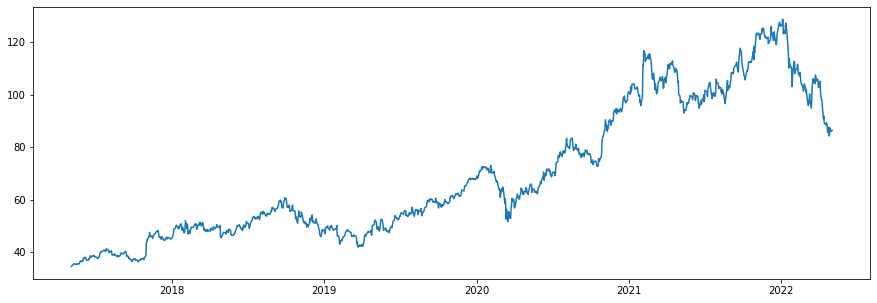

In [ ]:
# time을 기준으로 결측치 보간
sony_ts = sony_ts.interpolate(method='time')
# 결측치 확인
sony_ts[sony_ts.isna()]

print(sony_ts[sony_ts.isna()])
plt.plot(sony_ts)

### 📌 **02_로그 변환**

- **로그 변환 및 시각화**

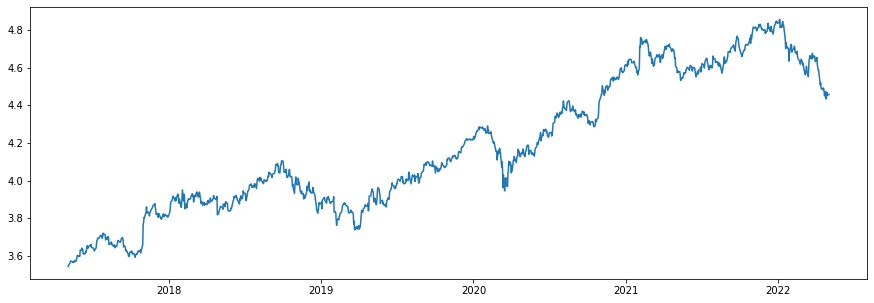

In [ ]:
sony_ts_log = np.log(sony_ts)
plt.plot(sony_ts_log)

## 📑 **(3) 시계열 안정성 분석**

### 📌 **01_정성적 그래프 분석**

- **구간 통계치 시각화**  
원본시계열, 이동평균, 이동표준편차 시각화

In [ ]:
def plot_rolling_statistics(sony_timeseries, window=12):

    # 이동평균 시계열
    rolmean = sony_timeseries.rolling(window=window).mean()
    # 이동표준편차 시계열
    rolstd = sony_timeseries.rolling(window=window).std()

    # 원본시계열, 이동평균, 이동표준편차 시각화
    orig = plt.plot(sony_timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

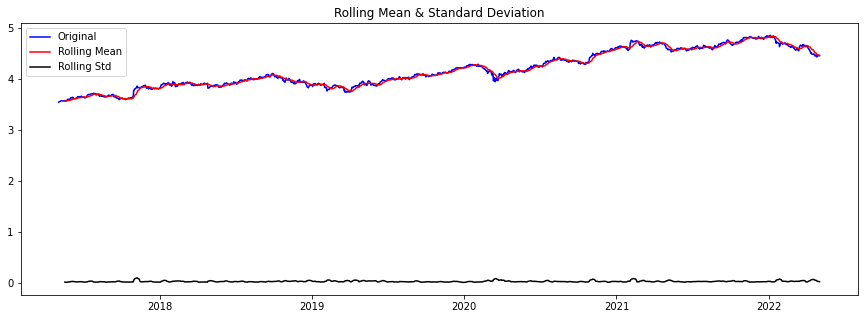

In [ ]:
plot_rolling_statistics(sony_ts_log, window=12)

### 📌 **02_정량적 Augmented Dicky-Fuller Test**

- **adfuller 메서드 호출 및 리턴 값 출력**

In [ ]:
def augmented_dickey_fuller_test(sony_timeseries):
    dftest = adfuller(sony_timeseries, autolag='AIC')  
    
    # adfuller 리턴 결과
    print('Results of Dickey-Fuller Test:')
    sony_dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        sony_dfoutput['Critical Value (%s)' % key] = value
    print(sony_dfoutput)

- **Augmented Dickey-Fuller Test**  
p-value : 0.513711  
p-value가 0.5 정도로 귀무가설 기각이 가능하다고 하기에 애매한 수치임 (안정적 시계열이라고 말하기 애매함)

In [ ]:
augmented_dickey_fuller_test(sony_ts_log)

Results of Dickey-Fuller Test:
Test Statistic                   -1.539856
p-value                           0.513711
#Lags Used                        8.000000
Number of Observations Used    1250.000000
Critical Value (1%)              -3.435592
Critical Value (5%)              -2.863855
Critical Value (10%)             -2.568003
dtype: float64


### 📌 **03_시계열 분해 (Time Series Decomposition)**

- **원본 시계열 에서 추세(trend), 계절성(Seasonality) 분리 및 시각화**  
그래프 사이즈 : 가로 10, 세로 5

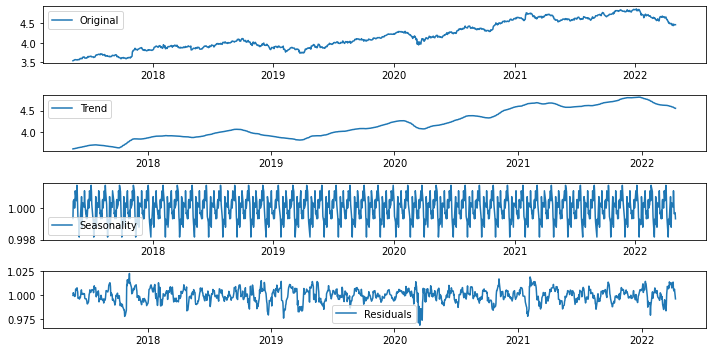

In [ ]:
decomposition = seasonal_decompose(sony_ts_log, model='multiplicative', period = 30)

#추세
trend = decomposition.trend
#계절성
seasonal = decomposition.seasonal
# 로그 변환한 원본 - (추세 + 계절성)
residual = decomposition.resid

plt.rcParams["figure.figsize"] = (10,5)

plt.subplot(411)
plt.plot(sony_ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

### 📌 **04_Residual 안정성 확인**

- **residual 안정성 여부 시각화**  
그래프 사이즈 : 가로 10, 세로 5

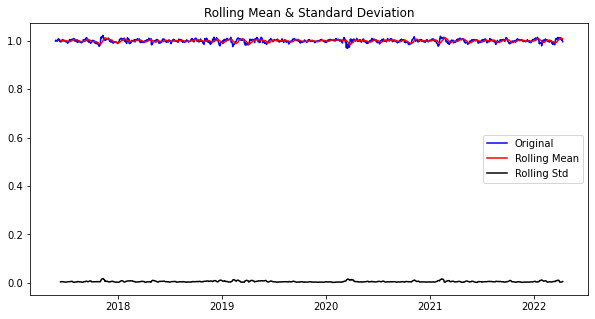

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
plot_rolling_statistics(residual)

- **Augmented Dickey-Fuller Test**  
p-value :  8.970922e-15  

In [ ]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.144995e+01
p-value                        5.891437e-21
#Lags Used                     1.800000e+01
Number of Observations Used    1.210000e+03
Critical Value (1%)           -3.435766e+00
Critical Value (5%)           -2.863932e+00
Critical Value (10%)          -2.568043e+00
dtype: float64


## 📑 **(4) 학습, 테스트 데이터셋 생성**

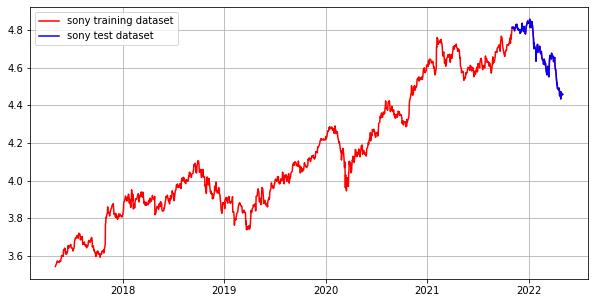

In [ ]:
sony_train_data, sony_test_data = sony_ts_log[:int(len(sony_ts_log)*0.9)], sony_ts_log[int(len(sony_ts_log)*0.9):]
plt.figure(figsize=(10,5))
plt.grid(True)

# 자연스러운 연출
plt.plot(sony_ts_log, c='r', label='sony training dataset')
plt.plot(sony_test_data, c='b', label='sony test dataset')
plt.legend()

## 📑 **(5) 적정 ARIMA 모수 찾기**

### 📌 **01_ACF, PACF**

- **ACF (Autocorrelation)**  
MA 모델(이동평균) 시차 q 결정   
q는 ACF가 점차 감소하는 모양새로 적합한 값 없음 q=0 or 바꿔가면서 확인 필요  

- **PACF (Partial Autocorrelation)**  
AR 모델 (자기회귀) 시차 p 결정   
p가 2 이상인 구간에서 PACF 0에 근접하므로 p=1 적합  

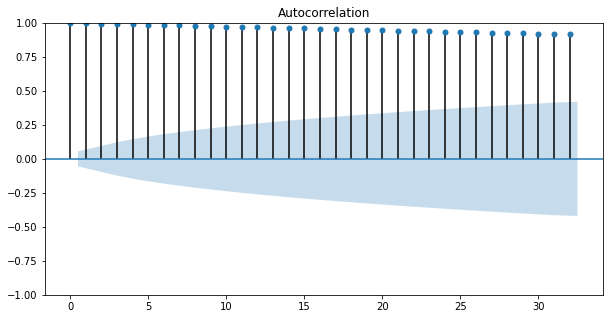

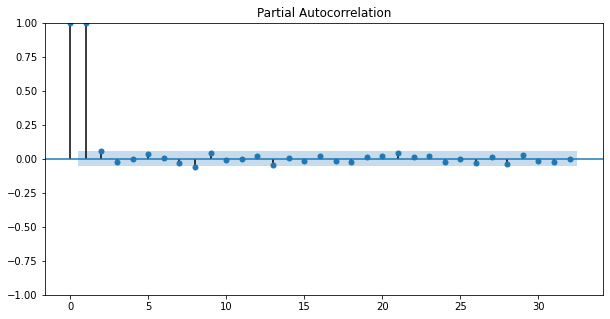

In [ ]:
# ACF (Autocorrelation)
plot_acf(sony_ts_log)  

# PACF (Partial Autocorrelation)
plot_pacf(sony_ts_log)

plt.show()

### 📌 **02_차분 안정성 확인**

- **1차 차분 및 2차 차분**  
diff_1 (Difference 1st)  

- 2차 차분이 더 좋은 성능을 내지만 d 값도 q와 같이 값을 바꿔가며 최적의 값 확인  

Results of Dickey-Fuller Test:
Test Statistic                -1.259324e+01
p-value                        1.801950e-23
#Lags Used                     7.000000e+00
Number of Observations Used    1.250000e+03
Critical Value (1%)           -3.435592e+00
Critical Value (5%)           -2.863855e+00
Critical Value (10%)          -2.568003e+00
dtype: float64


Results of Dickey-Fuller Test:
Test Statistic                -1.220895e+01
p-value                        1.175832e-22
#Lags Used                     2.300000e+01
Number of Observations Used    1.233000e+03
Critical Value (1%)           -3.435665e+00
Critical Value (5%)           -2.863887e+00
Critical Value (10%)          -2.568020e+00
dtype: float64


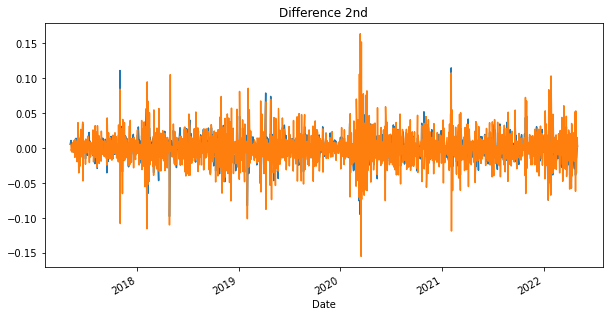

In [ ]:
diff_1 = sony_ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

print('\n')

diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

## 📑 **(6) ARIMA 모델 훈련과 테스트**

### 📌 **01_ARIMA 모델 훈련**

- **ARIMA 모델 빌드 및 훈련**  

In [ ]:
sony_model = ARIMA(sony_train_data, order=(0, 1, 2))  
sony_fitted_m = sony_model.fit() 

print(sony_fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1133
Model:                 ARIMA(0, 1, 2)   Log Likelihood                2921.790
Date:                Thu, 05 May 2022   AIC                          -5837.580
Time:                        07:34:51   BIC                          -5822.484
Sample:                             0   HQIC                         -5831.877
                               - 1133                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0912      0.024     -3.785      0.000      -0.138      -0.044
ma.L2          0.0826      0.021      3.880      0.000       0.041       0.124
sigma2         0.0003   7.42e-06     45.220      0.0

### 📌 **02_모델 테스트 및 플로팅**

- **forecast() 메소드 활용**

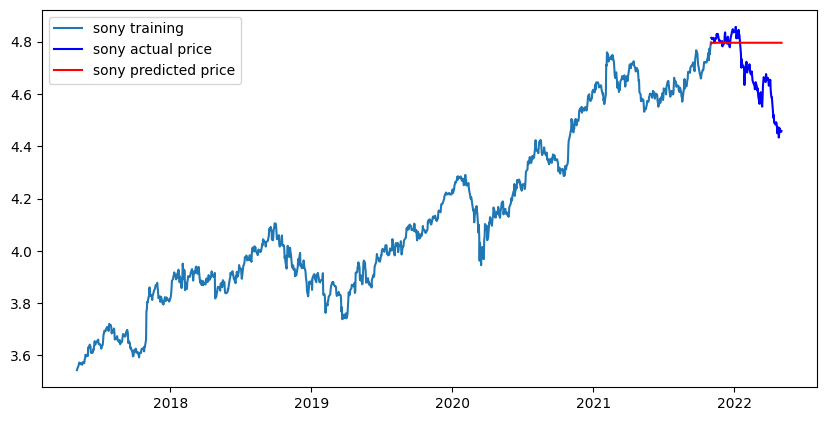

In [ ]:
sony_fc= sony_fitted_m.forecast(len(sony_test_data), alpha=0.05)
sony_fc = np.array(sony_fc)

# 예측결과
sony_fc_series = pd.Series(sony_fc, index=sony_test_data.index)

# 시각화
plt.figure(figsize=(10,5), dpi=100)
plt.plot(sony_train_data, label='sony training')
plt.plot(sony_test_data, c='b', label='sony actual price')
plt.plot(sony_fc_series, c='r',label='sony predicted price')
plt.legend()
plt.show()

### 📌 **03_최종 예측 모델 정확도 측정**

In [ ]:
mse = mean_squared_error(np.exp(sony_test_data), np.exp(sony_fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(sony_test_data), np.exp(sony_fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(sony_test_data), np.exp(sony_fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(sony_fc) - np.exp(sony_test_data))/np.abs(np.exp(sony_test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  274.4199602471191
MAE:  12.727499296522707
RMSE:  16.56562586342934
MAPE: 12.85%


<hr>

# 📕 **EXPLORATION 03-7 : 결론**

## 📑 **(1) 최종 예측 모델 결과**

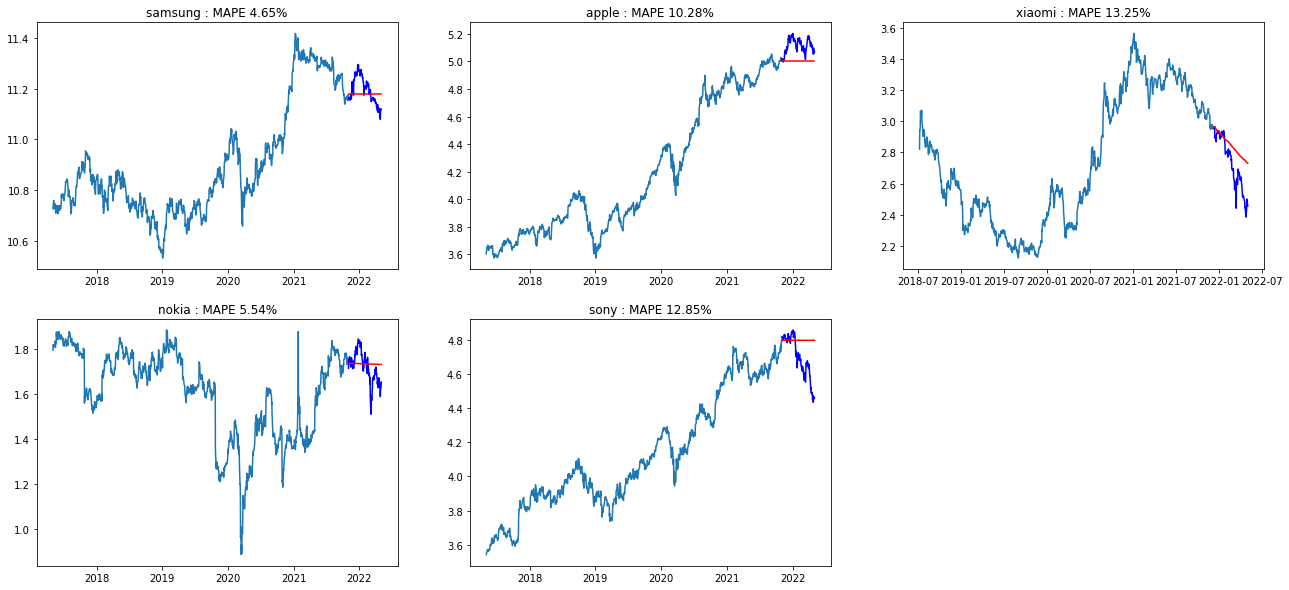

In [ ]:
plt.figure(figsize=(22, 10))

plt.subplot(2,3,1)

plt.plot(samsung_train_data)
plt.subplot(2,3,1).set_title('samsung : MAPE 4.65%')
plt.plot(samsung_test_data, c='b')
plt.plot(samsung_fc_series, c='r')


plt.subplot(2,3,2)
plt.subplot(2,3,2).set_title('apple : MAPE 10.28%')
plt.plot(apple_train_data)
plt.plot(apple_test_data, c='b')
plt.plot(apple_fc_series, c='r')

plt.subplot(2,3,3)
plt.subplot(2,3,3).set_title('xiaomi : MAPE 13.25%')
plt.plot(mi_train_data)
plt.plot(mi_test_data, c='b')
plt.plot(mi_fc_series, c='r')

plt.subplot(2,3,4)
plt.subplot(2,3,4).set_title('nokia : MAPE 5.54%')
plt.plot(nok_train_data)
plt.plot(nok_test_data, c='b')
plt.plot(nok_fc_series, c='r')

plt.subplot(2,3,5)
plt.subplot(2,3,5).set_title('sony : MAPE 12.85%')
plt.plot(sony_train_data)
plt.plot(sony_test_data, c='b')
plt.plot(sony_fc_series, c='r')

plt.show()

## 📑 **(2) 분석**

- **samsung, nokia**   
전체 평균을 따졌을 때는 비슷할 것 같지만, 일자-월별 결과 까지는 충분하게 예측하지 못함   

- **apple, sony**    
예측 범위를 벗어난 결과를 보여줌  

- **xiaomi**  
가장 실제와 가까운 결과를 보여줌




## 📑 **(3) 결론**

예측 결과를 확인해 보니 실제와 다소 차이가 있는 모습을 보여준다. 과거의 데이터에 일정 패턴이 발견되며 미래에도 동일하게 반복될 것이라는 안정적 데이터에만 예측이 가능한데, 이 부분을 확실하게 시각화해서 볼 수 있었던 것 같다. 주식의 경우, 외부의 요인 (국가적 상황 등)을 많이 받는 데이터 중 하나이기 때문에 미래의 예측이 불확실하다. 때문에 주식 예측은 시계열 데이터를 활용한 ARIMA 모델을 활용하는 방법은 적합하지 않다고 생각한다. 

<hr>